In [1]:
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

diabetes=datasets.load_diabetes()
X=diabetes.data[:150]
y=diabetes.target[:150]
lasso=linear_model.Lasso()

In [2]:
cv=KFold(5,shuffle=True,random_state=0)
print(cross_val_score(lasso,X,y,cv=cv))

[0.35875821 0.19962416 0.12762825 0.25642285 0.2913468 ]


In [16]:
from sklearn import svm, metrics
# CSV 파일을 읽어 들이고 가공하기
def load_csv(fname):
    labels=[]
    images=[]
    with open(fname,'r') as f:
        for line in f:
            cols=line.split(',')
            if len(cols) < 2: continue
            labels.append(int(cols.pop(0))) # 라벨(정답) 추출
            vals = list(map(lambda n:int(n)/256,cols)) # 테스트할 데이터 가공
            images.append(vals)
    return {'labels':labels,'images':images}
data=load_csv('train.csv')
test=load_csv('t10k.csv')
# 학습하기
clf=svm.SVC()
clf.fit(data['images'],data['labels'])
# 예측하기
predict=clf.predict(test['images'])
# 결과 확인하기
ac_score=metrics.accuracy_score(test['labels'], predict)
cl_report=metrics.classification_report(test['labels'], predict)
print('정답률=', ac_score)
print('리포트=')
print(cl_report)

c:\machine_learning\python_source\pythontest\venv\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


정답률= 0.7884231536926147
리포트=
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        42
           1       0.81      1.00      0.89        67
           2       0.84      0.69      0.76        55
           3       0.87      0.57      0.68        46
           4       0.76      0.75      0.75        55
           5       0.63      0.80      0.71        50
           6       0.97      0.67      0.79        43
           7       0.74      0.86      0.79        49
           8       0.91      0.72      0.81        40
           9       0.71      0.81      0.76        54

   micro avg       0.79      0.79      0.79       501
   macro avg       0.81      0.78      0.78       501
weighted avg       0.80      0.79      0.79       501



In [18]:
import pandas as pd
from sklearn import svm, metrics
from sklearn.model_selection import GridSearchCV
# MNIST 학습 데이터 읽어 들이기
train_csv=pd.read_csv('train.csv')
test_csv=pd.read_csv('t10k.csv')
# 필요한 열 추출하기
train_label=train_csv.iloc[:,0]
train_data=train_csv.iloc[:,1:785]
test_label=test_csv.iloc[:,0]
test_data=test_csv.iloc[:,1:785]
print('학습 데이터의 수=', len(train_label))
# 그리드 서치 매개변수 설정
params=[{'C':[1,10,100,1000], 'kernel':['linear']},
       {'C':[1,10,100,1000], 'kernel':['rbf'],'gamma':[1,10,100,1000]}] # gamma:커...
# 그리드 서치 수행
svc=svm.SVC()
clf=GridSearchCV(svc, params)
clf.fit(train_data, train_label)
print('학습기=',clf.best_estimator_)
# 테스트 데이터 확인하기
pre=clf.predict(test_data)
ac_score=metrics.accuracy_score(pre,test_label)
cl_report=metrics.classification_report(test_label,pre)
print('정답률=',ac_score)
print('리포트=')
print(cl_report)

학습 데이터의 수= 1000


c:\machine_learning\python_source\pythontest\venv\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


학습기= SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
정답률= 0.868
리포트=
              precision    recall  f1-score   support

           0       0.91      0.93      0.92        42
           1       0.97      1.00      0.99        67
           2       0.86      0.93      0.89        55
           3       0.84      0.80      0.82        46
           4       0.89      0.89      0.89        55
           5       0.72      0.84      0.78        50
           6       0.95      0.86      0.90        43
           7       0.80      0.83      0.82        48
           8       0.91      0.72      0.81        40
           9       0.84      0.80      0.82        54

   micro avg       0.87      0.87      0.87       500
   macro avg       0.87      0.86      0.86       500
weighted avg       0.87      0.87     

In [19]:
from sklearn import  datasets, linear_model
from sklearn.model_selection import train_test_split
diabetes=datasets.load_diabetes()
X=diabetes.data
y=diabetes.target
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
lasso=linear_model.Lasso()
model=lasso.fit(x_train,y_train)
model



Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [20]:
pred=model.predict(x_test)
pred[:10]

array([161.03367087, 128.95131563, 194.84549405, 121.86694658,
       139.12110493, 110.80457923, 147.45169749, 150.51877447,
       132.85205052, 103.74794764])

In [21]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,pred)

3630.873802886991

In [22]:
import math
rmse=math.sqrt(mean_squared_error(y_test,pred))
rmse

60.256732427895486

In [23]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,pred)

50.8529481369655

In [24]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y_test,pred)

0.3300120460346321

In [25]:
from sklearn.metrics import r2_score
r2_score(y_test, pred)

0.3294316244152544

In [26]:
import csv
with open('basket.csv','r',encoding='UTF8') as cf:
    transactions=[]
    r=csv.reader(cf)
    for row in r:
        transactions.append(row)
transactions

[['소주', '콜라', '와인'],
 ['소주', '오렌지주스', '콜라'],
 ['콜라', '맥주', '와인'],
 ['소주', '콜라', '맥주'],
 ['오렌지주스', '와인']]

In [32]:
from apyori import apriori
rules=apriori(transactions)
results=list(rules)
type(results)

list

In [33]:
results[0]

RelationRecord(items=frozenset({'맥주'}), support=0.4, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'맥주'}), confidence=0.4, lift=1.0)])

In [34]:
results[10]

RelationRecord(items=frozenset({'소주', '콜라'}), support=0.6, ordered_statistics=[OrderedStatistic(items_base=frozenset({'소주'}), items_add=frozenset({'콜라'}), confidence=1.0, lift=1.25), OrderedStatistic(items_base=frozenset({'콜라'}), items_add=frozenset({'소주'}), confidence=0.7499999999999999, lift=1.2499999999999998)])

In [35]:
print('lhs \trhs \t\tsupport\t\tconfidence\tlift')
for row in results:
    support=row[1]
    ordered_stat=row[2]
    for ordered_item in ordered_stat:
        lhs=[x for x in ordered_item[0]]
        rhs=[x for x in ordered_item[1]]
        confidence=ordered_item[2]
        lift=ordered_item[3]
        print(lhs,' => ',rhs,'\t{:>5.4f}\t{:>5.4f}\t{:>5.4f}'.\
              format(support,confidence,lift))

lhs 	rhs 		support		confidence	lift
[]  =>  ['맥주'] 	0.4000	0.4000	1.0000
[]  =>  ['소주'] 	0.6000	0.6000	1.0000
[]  =>  ['오렌지주스'] 	0.4000	0.4000	1.0000
[]  =>  ['와인'] 	0.6000	0.6000	1.0000
[]  =>  ['콜라'] 	0.8000	0.8000	1.0000
['맥주']  =>  ['소주'] 	0.2000	0.5000	0.8333
['소주']  =>  ['맥주'] 	0.2000	0.3333	0.8333
['맥주']  =>  ['와인'] 	0.2000	0.5000	0.8333
['와인']  =>  ['맥주'] 	0.2000	0.3333	0.8333
['맥주']  =>  ['콜라'] 	0.4000	1.0000	1.2500
['콜라']  =>  ['맥주'] 	0.4000	0.5000	1.2500
['소주']  =>  ['오렌지주스'] 	0.2000	0.3333	0.8333
['오렌지주스']  =>  ['소주'] 	0.2000	0.5000	0.8333
['소주']  =>  ['와인'] 	0.2000	0.3333	0.5556
['와인']  =>  ['소주'] 	0.2000	0.3333	0.5556
['소주']  =>  ['콜라'] 	0.6000	1.0000	1.2500
['콜라']  =>  ['소주'] 	0.6000	0.7500	1.2500
['오렌지주스']  =>  ['와인'] 	0.2000	0.5000	0.8333
['와인']  =>  ['오렌지주스'] 	0.2000	0.3333	0.8333
['오렌지주스']  =>  ['콜라'] 	0.2000	0.5000	0.6250
['콜라']  =>  ['오렌지주스'] 	0.2000	0.2500	0.6250
['와인']  =>  ['콜라'] 	0.4000	0.6667	0.8333
['콜라']  =>  ['와인'] 	0.4000	0.5000	0.8333
['소주', '맥주']  =>  ['

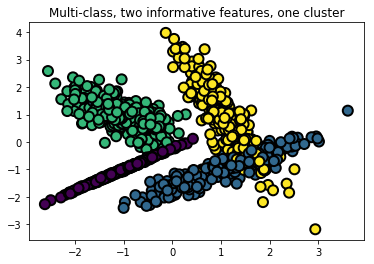

In [56]:
# make_classification함수 - 설정에 따른 분류용 가상 데이터를 생성하는 명령
# 인수
# n_samples : 표본 데이터의 수, 디폴트 100
# n_features : 독립 변수의 수, 디폴트 20
# n_informative : 독립 변수 중 종속 변수와 상관 관계가 있는 성분의 수, 디폴트 2
# n_redundant : 독립 변수 중 다른 독립 변수의 선형 조합으로 나타나는 성분의 수, 디폴트 2
# n_repeated : 독립 변수 중 단순 중복된 성분의 수, 디폴트 0
# n_classes : 종속 변수의 클래스 수, 디폴트 2
# n_clusters_per_class : 클래스 당 클러스터의 수, 디폴트 2
# weights : 각 클래스에 할당된 표본 수
# random_state : 난수 발생 시드
# 반환값
# X : [n_samples, n_features] 크기의 배열. 독립 변수
# y : [n_samples] 크기의 배열. 종속 변수
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

plt.title('Multi-class, two informative features, one cluster')
X, y =make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, n_classes=4, random_state=123)
plt.scatter(X[:,0],X[:,1],marker='o',c=y,s=100,edgecolors='k',linewidths=2)
plt.show()

In [57]:
from sklearn.cluster import KMeans
model=KMeans(n_clusters=4, init='random')
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [58]:
model.cluster_centers_

array([[-1.09927095,  1.0327563 ],
       [-0.83688123, -1.15053575],
       [ 0.78093906,  1.69965142],
       [ 1.40287753, -0.57373222]])

In [59]:
pred=model.predict(X)
pred

array([3, 2, 3, 2, 0, 0, 3, 1, 0, 1, 1, 1, 3, 3, 2, 1, 0, 1, 1, 3, 3, 0,
       0, 3, 0, 1, 3, 3, 2, 3, 2, 0, 1, 0, 1, 0, 3, 2, 0, 1, 3, 2, 0, 3,
       0, 3, 0, 1, 1, 3, 1, 0, 0, 1, 2, 1, 1, 3, 2, 0, 0, 2, 0, 1, 1, 0,
       1, 2, 0, 3, 3, 1, 1, 2, 0, 3, 3, 1, 0, 1, 0, 2, 0, 0, 3, 2, 0, 2,
       0, 1, 1, 3, 0, 1, 0, 2, 1, 3, 1, 3, 2, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       2, 2, 2, 0, 2, 0, 3, 2, 1, 0, 3, 0, 3, 3, 2, 2, 2, 1, 1, 2, 1, 1,
       3, 1, 2, 3, 1, 2, 0, 1, 0, 3, 3, 1, 3, 3, 2, 3, 2, 1, 1, 0, 1, 2,
       3, 0, 3, 2, 3, 1, 1, 0, 0, 3, 2, 1, 1, 1, 0, 1, 3, 3, 1, 0, 1, 0,
       3, 3, 3, 2, 1, 1, 3, 0, 2, 3, 3, 3, 3, 3, 3, 2, 1, 3, 0, 1, 3, 1,
       0, 0, 3, 3, 3, 0, 3, 1, 1, 1, 3, 0, 1, 0, 3, 3, 3, 3, 2, 1, 0, 3,
       0, 0, 3, 2, 0, 2, 1, 3, 0, 1, 0, 3, 1, 1, 1, 3, 0, 3, 2, 0, 0, 3,
       0, 1, 0, 1, 2, 0, 1, 1, 2, 0, 3, 1, 3, 1, 1, 1, 3, 0, 3, 1, 3, 1,
       3, 1, 2, 0, 3, 0, 1, 0, 3, 2, 2, 3, 3, 2, 1, 3, 1, 0, 1, 0, 2, 0,
       1, 3, 3, 1, 3, 2, 0, 0, 3, 0, 2, 1, 3, 1, 1,

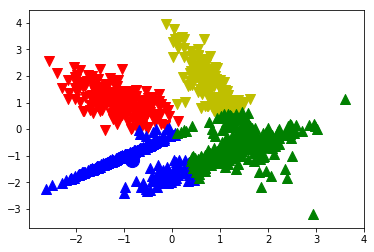

In [60]:
c0, c1, c2, c3 = model.cluster_centers_
plt.scatter(X[model.labels_==0,0],X[model.labels_==0,1],s=100,marker='v',c='r')
plt.scatter(X[model.labels_==1,0],X[model.labels_==1,1],s=100,marker='^',c='b')
plt.scatter(X[model.labels_==2,0],X[model.labels_==2,1],s=100,marker='v',c='y')
plt.scatter(X[model.labels_==3,0],X[model.labels_==3,1],s=100,marker='^',c='g')
plt.scatter(c0[0],c0[1],s=200,c='r')
plt.scatter(c1[0],c1[1],s=200,c='b')
plt.scatter(c2[0],c2[1],s=200,c='y')
plt.scatter(c3[0],c3[1],s=200,c='g')
plt.show()

In [61]:
import pandas as pd
import numpy as np
df=pd.DataFrame(np.hstack([X,
                           np.linalg.norm(X-c0,axis=1)[:,np.newaxis],
                           np.linalg.norm(X-c1,axis=1)[:,np.newaxis],
                           np.linalg.norm(X-c2,axis=1)[:,np.newaxis],
                           np.linalg.norm(X-c3,axis=1)[:,np.newaxis],
                           model.labels_[:,np.newaxis]]),
                columns=['x0','x1','d0','d1','d2','d3','class'])
df

,x0,x1,d0,d1,d2,d3,class
0,0.555708,-1.820519,3.298505,1.545374,3.527369,1.507373,3.0
1,0.625014,2.070939,2.012705,3.537660,0.402700,2.756693,2.0
2,1.340974,0.097917,2.613182,2.510316,1.696818,0.674496,3.0
3,1.032851,0.863417,2.138836,2.748073,0.873355,1.484020,2.0
4,-1.472756,1.218028,0.416913,2.452434,2.304583,3.388166,0.0
5,-0.859690,1.060758,0.241212,2.211411,1.760638,2.791195,0.0
6,1.624662,0.106116,2.877234,2.763760,1.803115,0.715110,3.0
7,-0.863857,-0.902361,1.949384,0.249637,3.078282,2.290432,1.0
8,-1.673225,2.005678,1.129602,3.265143,2.473171,4.014445,0.0
9,-0.829373,-0.877129,1.928861,0.273510,3.038569,2.252774,1.0


In [62]:
def plot_clusters(model,data):
    c0, c1, c2, c3 = model.cluster_centers_
    plt.scatter(data[model.labels_==0,0],X[model.labels_==0,1],s=20,marker='v',c='r')
    plt.scatter(data[model.labels_==1,0],X[model.labels_==1,1],s=20,marker='^',c='b')
    plt.scatter(X[model.labels_==2,0],X[model.labels_==2,1],s=20,marker='v',c='y')
    plt.scatter(X[model.labels_==3,0],X[model.labels_==3,1],s=20,marker='^',c='g')
    plt.scatter(c0[0], c0[1],s=40,c='r')
    plt.scatter(c1[0], c1[1],s=40,c='b')
    plt.scatter(c2[0], c2[1],s=40,c='y')
    plt.scatter(c3[0], c3[1],s=40,c='g')

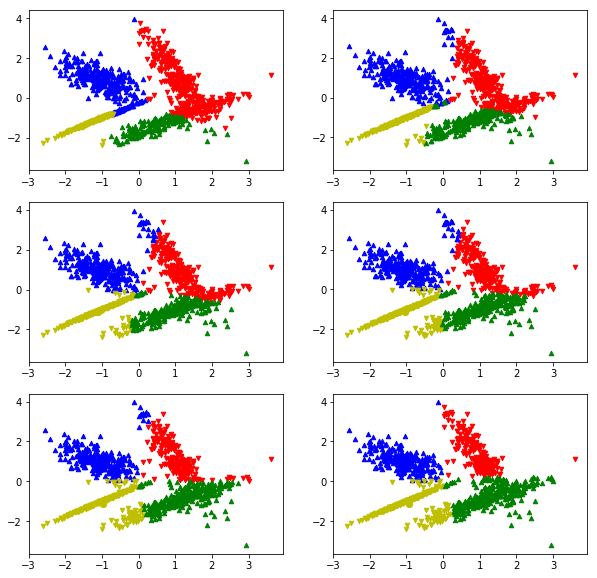

In [63]:
plt.figure(figsize=(10,10))
model1= KMeans(n_clusters=4,init='random',n_init=1,max_iter=1,random_state=1)
model1.fit(X)
plt.subplot(3,2,1)
plot_clusters(model1, X)

model2= KMeans(n_clusters=4,init='random',n_init=1,max_iter=2,random_state=1)
model2.fit(X)
plt.subplot(3,2,2)
plot_clusters(model2, X)

model3= KMeans(n_clusters=4,init='random',n_init=1,max_iter=3,random_state=1)
model3.fit(X)
plt.subplot(3,2,3)
plot_clusters(model3, X)

model4= KMeans(n_clusters=4,init='random',n_init=1,max_iter=4,random_state=1)
model4.fit(X)
plt.subplot(3,2,4)
plot_clusters(model4, X)

model5= KMeans(n_clusters=4,init='random',n_init=1,max_iter=5,random_state=1)
model5.fit(X)
plt.subplot(3,2,5)
plot_clusters(model5, X)

model6= KMeans(n_clusters=4,init='random',n_init=1,max_iter=6,random_state=1)
model6.fit(X)
plt.subplot(3,2,6)
plot_clusters(model6, X)